In [8]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
# from TimeGAN.timegan import timegan
# 2. Data loading
# 3. Metrics
# from TimeGAN.metrics.discriminative_metrics import discriminative_score_metrics
# from TimeGAN.metrics.predictive_metrics import predictive_score_metrics
# from TimeGAN.metrics.visualization_metrics import visualization

In [9]:
import pandas as pd
import numpy as np
import pickle



In [10]:
import plotly.express as px
import plotly.graph_objects as go

# Libraries

* switch to paper2022 env

In [11]:
# activate line execution
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Visualization

In [5]:
df = pd.read_csv('TimeGAN/data/stock_data.csv')
px.line(df, x=df.index, y='Open', title='Stock Price')
px.line(df, x=df.index, y='Volume', title='Stock Price')

In [14]:
# https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction
# https://github.com/LuisM78/Appliances-energy-prediction-data
df = pd.read_csv('TimeGAN/data/energy_data.csv')
df.columns
df.shape
df.dtypes
df.head()

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

(19735, 28)

Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# Format data
* use `paper2022` env
* we use [prepare_stock_and_energy.ipynb](prepare_stock_and_energy.ipynb)

In [15]:
loc = "energy"

import numpy as np
import pandas as pd 
from stock_energy.missingprocessor import Processor
import pickle

data_path = "./TimeGAN/data"

seq_len = 24
df = pd.read_csv('{}/{}_data.csv'.format(data_path,loc), sep = ",")
types = ["continuous" for i in range(len(df.columns))]

P = Processor(types)
# Flip the data to make chronological data
ori_data = P.fit_transform(df)
ori_data = ori_data[::-1]

temp_data = [ori_data[i:i + seq_len] for i in range(0, len(ori_data) - seq_len)]    

from fastNLP import DataSet
dataset = DataSet({"seq_len": [seq_len] * len(temp_data), "dyn": temp_data, "sta":[0]*len(temp_data)})
dic = {
    "train_set": dataset,
    "dynamic_processor": P,
    "static_processor": Processor([])
}
print(P.dim, len(temp_data))
from utils.general import make_sure_path_exists
make_sure_path_exists("./data")
with open("./data/{}.pkl".format(loc), "wb") as f:
    pickle.dump(dic, f)

print('data saved in:' + "./data/{}.pkl".format(loc))

Appliances 1 None continuous
lights 1 None continuous
T1 1 None continuous
RH_1 1 None continuous
T2 1 None continuous
RH_2 1 None continuous
T3 1 None continuous
RH_3 1 None continuous
T4 1 None continuous
RH_4 1 None continuous
T5 1 None continuous
RH_5 1 None continuous
T6 1 None continuous
RH_6 1 None continuous
T7 1 None continuous
RH_7 1 None continuous
T8 1 None continuous
RH_8 1 None continuous
T9 1 None continuous
RH_9 1 None continuous
T_out 1 None continuous
Press_mm_hg 1 None continuous
RH_out 1 None continuous
Windspeed 1 None continuous
Visibility 1 None continuous
Tdewpoint 1 None continuous
rv1 1 None continuous
rv2 1 None continuous
28 19711
data saved in:./data/energy.pkl


# Train RTSGAN
* set env to paper2022
* for stock dataset:
    * ```python main_stock.py --dataset "./data/stock.pkl" --log-dir "./stock_result" --task-name stock_rep --python-seed 1374 --epochs 1000 --iterations 15000```
* for energy dataset:
    * ```python main_stock.py --dataset "./data/energy.pkl" --log-dir "./energy_result" --task-name energy_rep --python-seed 1374 --epochs 200 --iterations 1000                  --hidden-dim 112 --embed-dim 448 --noise-dim 448 --layers 3```

python main_stock.py --dataset "./data/energy.pkl" --log-dir "./energy_result" --task-name energy_repee --python-seed 1374 --epochs 3 --iterations 1

    * git issue for replication: https://github.com/acphile/RTSGAN/issues/3

# Vis Synthetic
* To generate data again, add the following arguments:
    * ```--fix-ae "stock_result/stock_rep/ae.dat" --fix-gan "stock_result/stock_rep/generator.dat"```
    * ```--fix-ae "energy_result/energy_rep/ae.dat" --fix-gan "energy_result/energy_rep/generator.dat"```



In [ ]:
# load original data
with open('data/stock.pkl', 'rb') as f:
    ori_data = pickle.load(f)

ori_data.keys()
ori_data['train_set']
len(ori_data['train_set'])
ori_data['train_set'][0]['dyn'][:5]

In [ ]:
# load synthetic data
with open('stock_result/stock_rep/data', 'rb') as f:
    syn_data = pickle.load(f)

syn_data.keys()
syn_data['gen_set']
len(syn_data['gen_set'])
syn_data['gen_set'][0]['dyn'][:5]

In [13]:
# checking the generated data

with open('./stock_result/stock/data', 'rb') as f:
    gen_data = pickle.load(f)
len(gen_data)
len(gen_data[0])
len(gen_data[0][0])

X = [ np.array(example) for example in gen_data] 
X[0].shape

3661

24

6

(24, 6)

In [14]:
# visualize the generated data
fig = go.Figure()

for i in range(10):
    _ = fig.add_trace(go.Scatter(x=np.arange(24), y=X[i][:,1]))
fig.show()

NameError: name 'go' is not defined

In [ ]:
# visualize original data
fig = go.Figure()

for i in range(10):
    _ = fig.add_trace(go.Scatter(x=np.arange(24), y=ori_data[i][:,1]))
fig.show()

# New Benchmark!

In [6]:
# python main_stock.py --dataset ./data/stock.pkl --task-name stock --python-seed 1374 --epochs 100 --iterations 1000

In [7]:
# load real data embedded

data_real = real_data_loading('stock', 24)
with open('stock_result/stock/test/train_hidden', 'rb') as f:
    data_real_embedded = pickle.load(f)
data_real_embedded.shape

df_real_embedded = pd.DataFrame(data_real_embedded, columns = [f"f_{i}" for i in range(data_real_embedded.shape[1])])
df_real_embedded['target'] = np.random.randint(0,2, size = len(df_real_embedded))
df_real_embedded.head()


(3661, 96)

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,target
0,-0.141285,0.321534,1.702180,0.521943,0.071580,0.517952,1.243903,0.333758,-0.143609,-0.297804,...,-0.307623,0.077742,0.989686,-0.994277,-0.783741,-0.157698,0.777955,0.870524,0.975904,0
1,-0.141538,0.310076,1.723230,0.550147,0.087988,0.542104,1.242107,0.326370,-0.141223,-0.301765,...,-0.334197,0.040223,0.987886,-0.994114,-0.779794,-0.163065,0.774142,0.876400,0.971086,0
2,-0.139902,0.283224,1.734957,0.569644,0.113337,0.552476,1.234695,0.323825,-0.145435,-0.306084,...,-0.351236,0.013852,0.986721,-0.994020,-0.769796,-0.203176,0.769084,0.885453,0.967208,0
3,-0.137224,0.241566,1.731983,0.584941,0.139803,0.553224,1.219604,0.324401,-0.155026,-0.309618,...,-0.361577,-0.004007,0.986190,-0.993976,-0.755267,-0.266467,0.762471,0.889193,0.963719,0
4,-0.133228,0.200118,1.719634,0.595363,0.156407,0.556351,1.194434,0.326114,-0.166167,-0.311999,...,-0.369456,-0.011824,0.986058,-0.993926,-0.738433,-0.343115,0.753641,0.885948,0.959249,0


In [8]:
# load synthetic data embedded
with open('stock_result/stock/test/syn_hidden', 'rb') as f:
    data_syn_embedded = pickle.load(f)
data_syn_embedded.shape
df_syn_embedded = pd.DataFrame(data_syn_embedded, columns = [f"f_{i}" for i in range(data_syn_embedded.shape[1])])
df_syn_embedded['target'] = np.random.randint(0,2, size = len(df_syn_embedded))
df_syn_embedded.head()

(3661, 96)

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,target
0,1.365103,0.064436,0.283225,-0.043623,0.505655,1.326107,-0.141509,-0.134054,-0.125102,0.213952,...,-0.156209,-0.270524,-0.038141,-0.307576,0.212351,-0.903158,0.000504,0.690289,-0.157408,1
1,0.956544,0.364866,0.831456,-0.035190,0.363477,1.802648,-0.084403,-0.105679,-0.171180,-0.052711,...,-0.106691,-0.595380,0.242969,-0.742947,-0.038264,-0.984409,-0.177898,0.561555,-0.040642,0
2,0.296046,0.349670,1.362991,-0.021669,0.041503,1.649263,0.182718,-0.007306,-0.215737,-0.188920,...,-0.104600,-0.080953,0.416708,-0.967008,-0.427854,-0.908286,0.382033,0.464929,0.160654,1
3,0.965322,0.517386,0.888013,-0.082489,0.094161,1.788231,-0.065242,-0.062648,-0.206262,-0.125083,...,-0.073309,-0.193261,0.362077,-0.834429,-0.130775,-0.950363,-0.122840,0.176772,0.099545,1
4,1.287967,0.638540,0.648580,-0.092347,0.104982,1.580925,-0.100460,-0.063408,-0.125171,-0.049309,...,-0.291429,0.191507,0.480836,-0.752358,-0.117990,-0.866394,-0.019692,0.552208,0.125107,0


In [9]:
# two lines from benchmark-> __init__.py
from pathlib import Path
from synthcity.metrics import Metrics
warnings.filterwarnings("ignore")

from synthcity.benchmark import Benchmarks
from synthcity.plugins.core.dataloader import GenericDataLoader



[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [10]:

# remove all previous files in workspace
import os
for file in os.listdir('workspace/'):
    os.remove('workspace/' + file)


loader_X_gt = GenericDataLoader(df_real_embedded, target_column="target", sensitive_columns=[])
loader_X_syn = GenericDataLoader(df_syn_embedded, target_column="target", sensitive_columns=[])


X_syn = loader_X_syn
X_ref_syn = X_syn
metrics = {
    # 'sanity': ['data_mismatch', 'common_rows_proportion'],
    'stats': ['jensenshannon_dist', 'alpha_precision'],
}
task_type = "classification"
use_metric_cache = True
X_augmented = None
workspace = Path("workspace")


"""
X_gt: Dataloader or DataFrame
    Reference real data
X_syn: Dataloader or DataFrame
    Synthetic data
X_train: Dataloader or DataFrame
    The data used to train the synthetic model (used for domias metrics only).
X_ref_syn: Dataloader or DataFrame
    Reference synthetic data (used for domias metrics only).
X_augmented: Dataloader or DataFrame
    Augmented data
"""
evaluation = Metrics.evaluate(
    loader_X_gt.train(),
    loader_X_syn,
    loader_X_gt.train(),
    loader_X_syn,
    X_augmented,
    metrics=metrics,
    task_type=task_type,
    workspace=workspace,
    use_cache=use_metric_cache,
)

evaluation

'\nX_gt: Dataloader or DataFrame\n    Reference real data\nX_syn: Dataloader or DataFrame\n    Synthetic data\nX_train: Dataloader or DataFrame\n    The data used to train the synthetic model (used for domias metrics only).\nX_ref_syn: Dataloader or DataFrame\n    Reference synthetic data (used for domias metrics only).\nX_augmented: Dataloader or DataFrame\n    Augmented data\n'

,min,max,mean,stddev,median,iqr,rounds,errors,durations,direction
stats.jensenshannon_dist.marginal,0.004361,0.004361,0.004361,0.000000,0.004361,0.000000,1,0,0.56,minimize
stats.alpha_precision.delta_precision_alpha_OC,0.972481,0.972481,0.972481,0.000000,0.972481,0.000000,1,0,7.17,maximize
stats.alpha_precision.delta_coverage_beta_OC,0.467987,0.467987,0.467987,0.000000,0.467987,0.000000,1,0,7.17,maximize
stats.alpha_precision.authenticity_OC,0.518784,0.518784,0.518784,0.000000,0.518784,0.000000,1,0,7.17,maximize
stats.alpha_precision.alpha_precision_curve_OC,0.000000,0.998975,0.513456,0.297876,0.521516,0.483350,1,0,7.17,maximize
stats.alpha_precision.beta_coverage_curve_OC,0.000342,0.452186,0.234016,0.133523,0.239413,0.212517,1,0,7.17,maximize
stats.alpha_precision.delta_precision_alpha_naive,0.976884,0.976884,0.976884,0.000000,0.976884,0.000000,1,0,7.17,maximize
stats.alpha_precision.delta_coverage_beta_naive,0.060633,0.060633,0.060633,0.000000,0.060633,0.000000,1,0,7.17,maximize
stats.alpha_precision.authenticity_naive,0.742486,0.742486,0.742486,0.000000,0.742486,0.000000,1,0,7.17,maximize
stats.alpha_precision.alpha_precision_curve_naive,0.000342,0.999317,0.504497,0.292836,0.516223,0.488388,1,0,7.17,maximize


In [13]:
# open .bkp file
import pickle
with open('workspace/sc_metric_cache_stats_alpha_precision_7004373852746058461_7961669295391223529_mean_3.9.0.bkp', 'rb') as f:
    temp = pickle.load(f)
temp.keys()

dict_keys(['delta_precision_alpha_OC', 'delta_coverage_beta_OC', 'authenticity_OC', 'alpha_precision_curve_OC', 'beta_coverage_curve_OC', 'delta_precision_alpha_naive', 'delta_coverage_beta_naive', 'authenticity_naive', 'alpha_precision_curve_naive', 'beta_coverage_curve_naive', 'alphas'])

In [18]:
fig = go.Figure()
_ = fig.add_trace(go.Scatter(x=temp['alphas'], y=temp['alpha_precision_curve_OC'], name='alpha_precision_curve_OC'))

_ = fig.add_trace(go.Scatter(x=temp['alphas'], y=temp['beta_coverage_curve_OC'], name='beta_coverage_curve_OC'))

fig.show()


# Replication

In [1]:
# switch to timegan2 environment
# conda list --explicit > timegan2_backup.txt
    # conda create --name timegan2_backup --file timegan2_backup.txt


# timegan2_backup
    # pip install fastNLP==0.5.5
    # pip install pandas
    # conda install -c anaconda scikit-learn


In [2]:
# activate line execution
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pickle
import numpy as np

In [4]:
import sys
import os
os.getcwd()
os.chdir('./TimeGAN')
os.getcwd()

'c:\\DATA\\Tasks\\RTSGAN'

'c:\\DATA\\Tasks\\RTSGAN\\TimeGAN'

In [5]:
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics

from data_loading import real_data_loading

In [6]:
DATASET = 'energy'

# TimeGAN style
# ori_data = real_data_loading('stock', 24)

with open('../data/{}.pkl'.format(DATASET), 'rb') as f:
    ori_data = pickle.load(f)
ori_data = [sample['dyn'] for sample in ori_data['train_set']]

c:\Users\hokarami\Anaconda3\envs\timegan2_backup\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\hokarami\Anaconda3\envs\timegan2_backup\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.2.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [7]:
add_syn = "../energy_result/energy_rep/syn_dataset.pkl"

with open(add_syn, 'rb') as f:
    syn_data = pickle.load(f)
syn_data = [sample['dyn'] for sample in syn_data['gen_set']]

In [8]:
len(syn_data), len(ori_data)
type(syn_data[0]), type(ori_data[0])
syn_data[0].shape, ori_data[0].shape

(19711, 19711)

(numpy.ndarray, numpy.ndarray)

((24, 28), (24, 28))

## Discriminative Score

In [9]:
metric_iteration = 5

discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(ori_data, syn_data)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)) + ' +/- '+str(np.round(np.std(discriminative_score), 4)))





Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instr

## Predictive Score

In [10]:
metric_iteration = 5

predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, syn_data)
  predictive_score.append(temp_pred)   
    


print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)) + ' +/- '+str(np.round(np.std(predictive_score), 4)))


Predictive score: 0.2632 +/- 0.0008


## t-SNE

In [11]:
from metrics.visualization_metrics import visualization

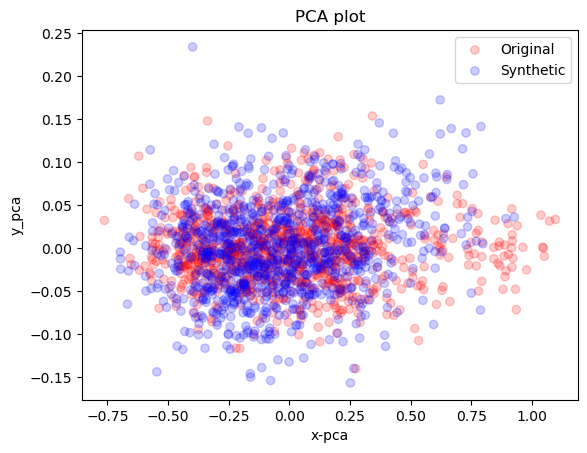

c:\Users\hokarami\Anaconda3\envs\timegan2_backup\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\hokarami\Anaconda3\envs\timegan2_backup\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.116s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.046384
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.499290
[t-SNE] KL divergence after 300 iterations: 1.438962


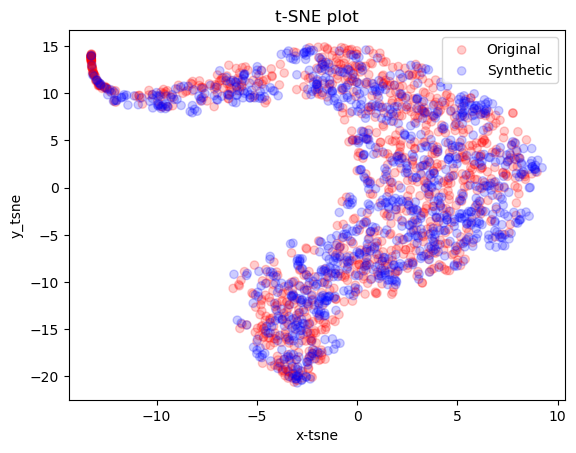

In [12]:
visualization(ori_data, syn_data, 'pca')
visualization(ori_data, syn_data, 'tsne')

# Conclusions
* dsfa